In [3]:
%matplotlib inline

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [1]:
def load_data():
    file = open('./data/G1', 'r')
    for (idx, line) in enumerate(file):
        if idx == 0:
            N = int(line.split(' ')[0])
            J = np.empty([N,N])
        else:
            J[int(line.split(' ')[1])-1][int(line.split(' ')[1])-1] = (line.split(' ')[2])

    file.close()
    tor_arr = torch.from_numpy(-J).float()
    return tor_arr

In [4]:
# generate a random Ising model
N = 20
J = torch.randint(0, 2, (N, N)) * 2 - 1.

# J = load_data()
# N = J.shape[0]
# print(J)

# symmetrize J
J = (J.T + J) / 2

In [5]:
def bSB(J, init_x, init_y, num_iters, dt):
    N = J.shape[0]
    x_comp = init_x.clone()
    y_comp = init_y.clone()
    
    # scaling of the matrix.
    xi = 0.5 / J.square().sum().div_(N - 1).sqrt_()
    
    # pump rate is linearly increased from 0 to 1.
    ps = torch.linspace(0, 1, num_iters)
    
    energies = []
    for i in range(num_iters):
        y_comp += ((-1 + ps[i]) * x_comp + xi * (J @ x_comp)) * dt
        x_comp += y_comp * dt

        y_comp[x_comp.abs() > 1] = 0.
        x_comp.clamp_(-1, 1)
        
        # compute the energy.
        sol = x_comp.sign()
        e = - 1 / 2 * sol.T @ J @ sol
        energies.append(e)
    
    return energies


def dSB(J, init_x, init_y, num_iters, dt):
    N = J.shape[0]
    x_comp = init_x.clone()
    y_comp = init_y.clone()
    
    # scaling of the matrix.
    xi = 0.5 / J.square().sum().div_(N - 1).sqrt_()
    
    # pump rate is linearly increased from 0 to 1.
    ps = torch.linspace(0, 1, num_iters)
    
    energies = []
    for i in range(num_iters):
        y_comp += ((-1 + ps[i]) * x_comp + xi * (J @ x_comp.sign())) * dt
        x_comp += y_comp * dt

        y_comp[x_comp.abs() > 1] = 0.
        x_comp.clamp_(-1, 1)
        
        # compute the energy.
        sol = x_comp.sign()
        e = - 1 / 2 * sol.T @ J @ sol
        energies.append(e)
    
    return energies


def SB(J, init_x, init_y, M, num_iters, dt):
    N = J.shape[0]
    x_comp = init_x.clone()
    y_comp = init_y.clone()
    
    # scaling of the matrix.
    xi = 0.7 / J.square().sum().div_(N - 1).sqrt_()
    
    # pump rate is linearly increased from 0 to 1.
    ps = torch.linspace(0, 1, num_iters)
    
    energies = []
    for i in range(num_iters):
        for m in range(M):
            x_comp += y_comp * dt / M
            y_comp += ((-1 + ps[i]) * x_comp - x_comp ** 3) * dt / M
        y_comp += xi * (J @ x_comp) * dt

        # compute the energy
        sol = x_comp.sign()
        e = - 1 / 2 * sol.T @ J @ sol
        energies.append(e)
    
    return energies

In [6]:
# initialization of the Ising machine (SB/bSB)
init_x = torch.empty([N, 1]).uniform_(-0.1, 0.1)
init_y = torch.empty([N, 1]).uniform_(-0.1, 0.1)

# parameters for the Ising machine (SB/bSB)
dt = 0.25
num_iters = 1000

# parameters for SB only.
M = 5

sb_energies = SB(J, init_x, init_y, M, num_iters, dt)
bsb_energies = bSB(J, init_x, init_y, num_iters, dt)

/home/xshian/anaconda3/lib/python3.9/site-packages/numpy/core/shape_base.py:65: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  ary = asanyarray(ary)
/home/xshian/anaconda3/lib/python3.9/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


[tensor([[5.]]), tensor([[-1.]]), tensor([[-5.]]), tensor([[-13.]]), tensor([[-13.]]), tensor([[-11.]]), tensor([[-17.]]), tensor([[-9.]]), tensor([[-9.]]), tensor([[-19.]]), tensor([[-23.]]), tensor([[-23.]]), tensor([[-17.]]), tensor([[-17.]]), tensor([[-17.]]), tensor([[-3.]]), tensor([[-13.]]), tensor([[-7.]]), tensor([[-3.]]), tensor([[5.]]), tensor([[9.]]), tensor([[7.]]), tensor([[-23.]]), tensor([[-23.]]), tensor([[-23.]]), tensor([[-17.]]), tensor([[-17.]]), tensor([[-17.]]), tensor([[-17.]]), tensor([[-19.]]), tensor([[-19.]]), tensor([[-19.]]), tensor([[-19.]]), tensor([[-11.]]), tensor([[-3.]]), tensor([[-3.]]), tensor([[-11.]]), tensor([[-1.]]), tensor([[1.]]), tensor([[1.]]), tensor([[-17.]]), tensor([[-13.]]), tensor([[-13.]]), tensor([[-13.]]), tensor([[-13.]]), tensor([[-13.]]), tensor([[-13.]]), tensor([[-17.]]), tensor([[-17.]]), tensor([[-11.]]), tensor([[-9.]]), tensor([[-9.]]), tensor([[-13.]]), tensor([[-17.]]), tensor([[-1.]]), tensor([[5.]]), tensor([[7.]]), te

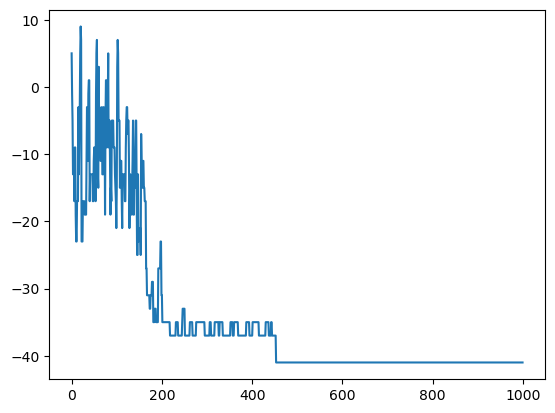

In [7]:
plt.plot(bsb_energies)
print(bsb_energies)

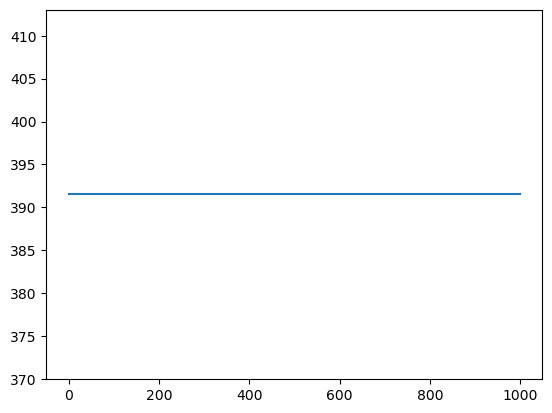

In [8]:
plt.plot(sb_energies)